In [22]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from scipy.signal import find_peaks
import pickle

## Astroquery

[Observations class docs](https://astroquery.readthedocs.io/en/latest/api/astroquery.mast.ObservationsClass.html#astroquery.mast.ObservationsClass.query_object)

In [3]:
obj = Observations.query_object('RU Lupi', radius = '0.1 deg') #default search radius is 0.2 degrees
pd_obj = obj.to_pandas() #convert to pandas for easier filtering

#filter by HST, STIS and COS FUC instruments
filtered_obs = pd_obj[(pd_obj['obs_collection']=='HST')& (pd_obj['intentType'] =='science') & (pd_obj['filters'] !='MIRVIS')]
ru_lupi_query = filtered_obs[(filtered_obs['instrument_name']=='COS/FUV')|(filtered_obs['instrument_name']=='STIS/FUV-MAMA')]
ru_lupi_query

,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
784,science,HST,CALCOS,COS/FUV,HST,G130M,UV,V-RU-LUPI,STAR;G V-IV;PRE-MAIN SEQUENCE STAR,lbgj02040,...,GTO/COS,<NA>,CIRCLE 239.17625559 -37.8210382 0.00034722,mast:HST/product/lbgj02040_x1dsum.png,mast:HST/product/lbgj02040_x1dsum.fits,PUBLIC,False,NaN,24842736,0.000000
785,science,HST,CALCOS,COS/FUV,HST,G130M,UV,V-RU-LUPI,STAR;G V-IV;PRE-MAIN SEQUENCE STAR,lbgj02050,...,GTO/COS,<NA>,CIRCLE 239.17625559 -37.8210382 0.00034722,mast:HST/product/lbgj02050_x1dsum.png,mast:HST/product/lbgj02050_x1dsum.fits,PUBLIC,False,NaN,24842737,0.000000
786,science,HST,CALCOS,COS/FUV,HST,G130M,UV,V-RU-LUPI,STAR;G V-IV;PRE-MAIN SEQUENCE STAR,lbgj02060,...,GTO/COS,<NA>,CIRCLE 239.17625559 -37.8210382 0.00034722,mast:HST/product/lbgj02060_x1dsum.png,mast:HST/product/lbgj02060_x1dsum.fits,PUBLIC,False,NaN,24842738,0.000000
787,science,HST,CALCOS,COS/FUV,HST,G130M,UV,V-RU-LUPI,STAR;G V-IV;PRE-MAIN SEQUENCE ST,lbgj02070,...,GTO/COS,<NA>,CIRCLE 239.17626938 -37.82101149 0.00069444,NaN,mast:HST/product/lbgj02070_x1dsum.fits,PUBLIC,False,NaN,24842739,0.000000
788,science,HST,CALCOS,COS/FUV,HST,G160M,UV,V-RU-LUPI,STAR;G V-IV;PRE-MAIN SEQUENCE STAR,lbgj02080,...,GTO/COS,<NA>,CIRCLE 239.17625559 -37.8210382 0.00034722,mast:HST/product/lbgj02080_x1dsum.png,mast:HST/product/lbgj02080_x1dsum.fits,PUBLIC,False,NaN,24842740,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,science,HST,CALSTIS,STIS/FUV-MAMA,HST,E140M,UV,HD142560,STAR;T TAURI STAR;PROTOPLANETARY DISK,o5e305010,...,GO,<NA>,POLYGON 239.17606809750643 -37.821054897235726...,NaN,NaN,PUBLIC,False,NaN,24922016,0.539132
1066,science,HST,CALSTIS,STIS/FUV-MAMA,HST,E140M,UV,HD142560,STAR;T TAURI STAR;PROTOPLANETARY DISK,o5e305020,...,GO,<NA>,POLYGON 239.17606809750643 -37.821054897235726...,NaN,NaN,PUBLIC,False,NaN,24922017,0.539132
1067,science,HST,CALSTIS,STIS/FUV-MAMA,HST,E140M,UV,HD142560,STAR;T TAURI STAR;PROTOPLANETARY DISK,o5e305040,...,GO,<NA>,POLYGON 239.17606809750643 -37.821054897235726...,NaN,NaN,PUBLIC,False,NaN,24922019,0.539132
1068,science,HST,CALSTIS,STIS/FUV-MAMA,HST,E140M,UV,HD142560,STAR;T TAURI STAR;PROTOPLANETARY DISK,o5e305050,...,GO,<NA>,POLYGON 239.17606809750643 -37.821054897235726...,NaN,NaN,PUBLIC,False,NaN,24922020,0.539132


## Downloading the data

In [4]:
#need to provide obsid not obs_id
#get product list first, and then download SCI fits files (x1d stuff)
#download using download_products: https://astroquery.readthedocs.io/en/latest/api/astroquery.mast.ObservationsClass.html#astroquery.mast.ObservationsClass.download_products
obsid = ru_lupi_query['obsid']
data_products = Observations.get_product_list(obsid)

#! TODO: get association files also
Observations.download_products(data_products, 
                               productType='SCIENCE',
                               calib_level=[3, 4],
                               extension='fits', 
                               download_dir='HST') #need to filter to just get x1d fits files

INFO: 5100 of 8180 products were duplicates. Only downloading 3080 unique product(s). [astroquery.mast.observations]


Local Path,Status,Message,URL
str52,str8,object,object
HST/mastDownload/HST/lbgj02040/lbgj02040_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj02050/lbgj02050_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj02060/lbgj02060_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj02070/lbgj02070_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj02080/lbgj02080_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj02090/lbgj02090_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj020a0/lbgj020a0_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj020b0/lbgj020b0_x1dsum.fits,COMPLETE,None,None
HST/mastDownload/HST/lbgj53040/lbgj53040_x1dsum.fits,COMPLETE,None,None


In [37]:
#list(Observations.get_metadata("products")) #available filters for download_products
#list(Observations.get_metadata("observations")) #available filters for query_criteria

[<Row index=0>
 Column Name  Column Label  Data Type Units               Description                Examples/Valid Values
    str26        str25         str7    str5                  str257                          str149       
 ----------- -------------- --------- ----- ---------------------------------------- ---------------------
      obs_id Observation ID    string       Observation identifier, given by mission  U24Z0101T, N4QF18030,
 <Row index=1>
 Column Name   Column Label   Data Type Units          Description               Examples/Valid Values    
    str26         str25          str7    str5             str257                         str149           
 ----------- ---------------- --------- ----- ------------------------------ -----------------------------
       obsID Product Group ID   integer       Database identifier for obs_id Long integer, e.g. 2007590987,
 <Row index=2>
  Column Name   Column Label Data Type Units    Description             Examples/Valid Values    

# Example Spectrum

In [5]:
file = 'HST/mastDownload/HST/lephae030/lephae030_x1dsum.fits'
hdul = fits.open(file)
x1dheader = fits.getheader(file, ext=0)
x1d_data = Table.read(file, hdu=1)

In [6]:
#https://spacetelescope.github.io/hst_notebooks/notebooks/STIS/view_data/view_data.html
x1d_data

SEGMENT,EXPTIME,NELEM,WAVELENGTH,FLUX,ERROR,ERROR_LOWER,GROSS,GCOUNTS,VARIANCE_FLAT,VARIANCE_COUNTS,VARIANCE_BKG,NET,BACKGROUND,DQ,DQ_WGT
,s,,Angstrom,erg / (Angstrom s cm2),erg / (Angstrom s cm2),erg / (Angstrom s cm2),ct / s,ct,ct,ct,ct,ct / s,ct / s,,
bytes4,float64,int32,float64[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],float32[16384],int16[16384],float32[16384]
FUVA,439.008,16384,1574.1717313743618 .. 1774.8230733174753,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,128 .. 128,0.0 .. 0.0
FUVB,439.008,16384,1385.9894779844765 .. 1586.5126386621057,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,128 .. 128,0.0 .. 0.0


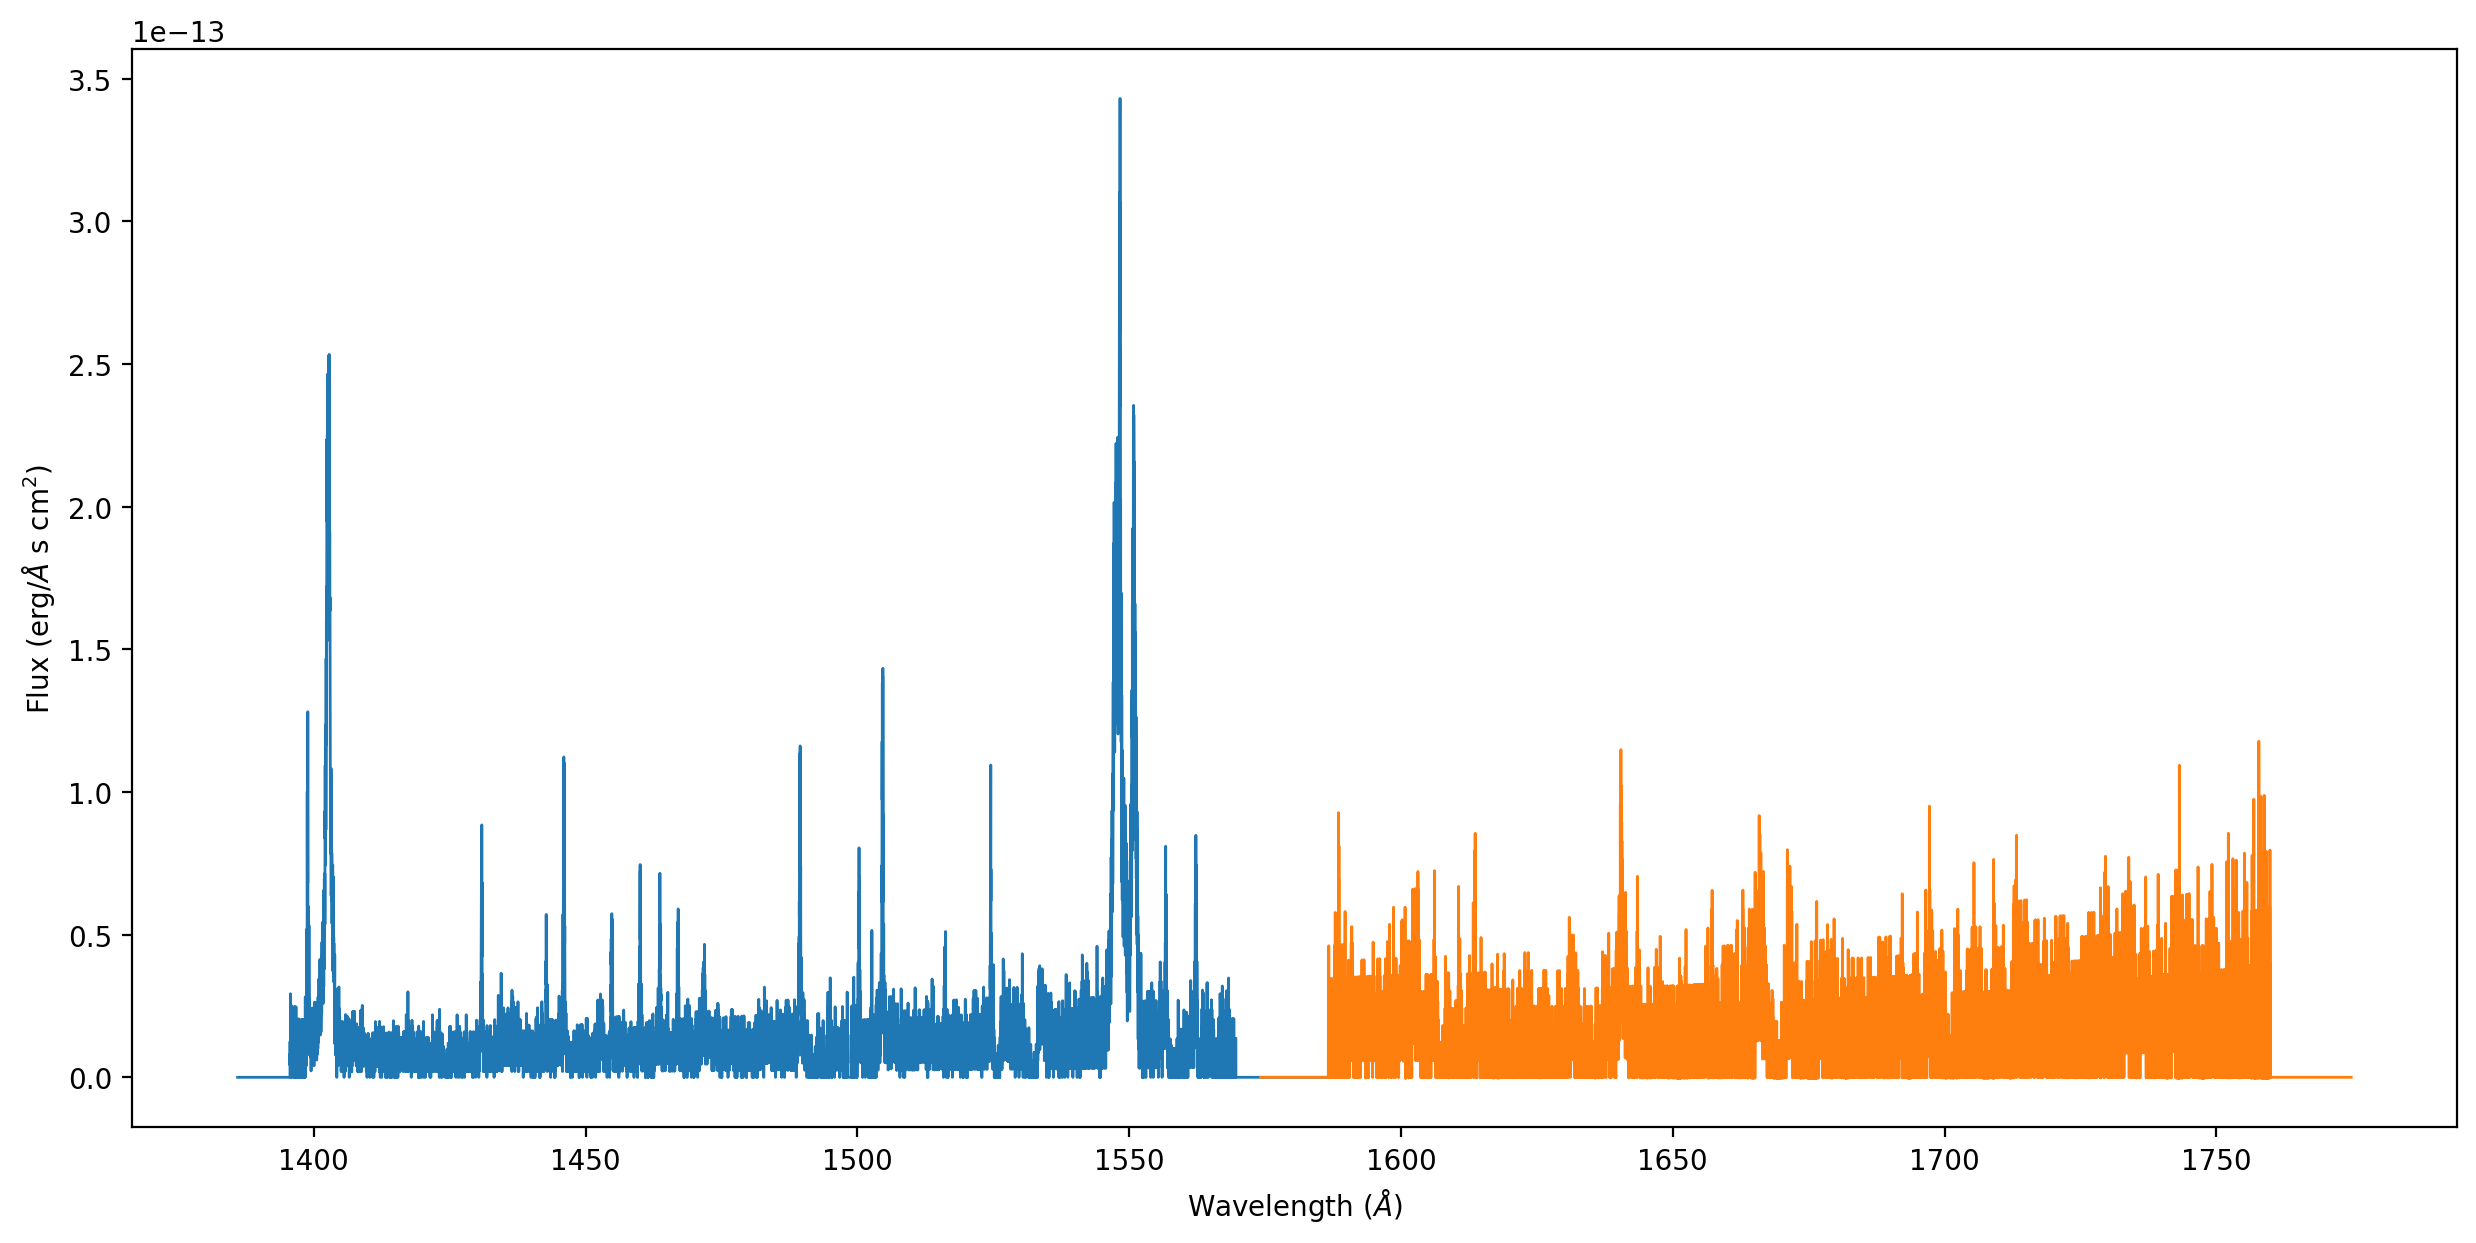

In [7]:
lam_uvb = x1d_data[1]['WAVELENGTH']
flux_uvb = x1d_data[1]['FLUX']
errb = x1d_data[1]['ERROR']
lam_uva = x1d_data[0]['WAVELENGTH']
flux_uva = x1d_data[0]['FLUX']
erra = x1d_data[0]['ERROR']

plt.figure(dpi=200, figsize=(15,7))
plt.plot(lam_uvb, flux_uvb, lw=1)
plt.plot(lam_uva, flux_uva, lw=1)
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($\text{erg}/\AA \text{ s} \text{ cm}^2$)')
#plt.xlim(1300, 1700)
plt.show()
#why is there a gap?? just how the filters work out

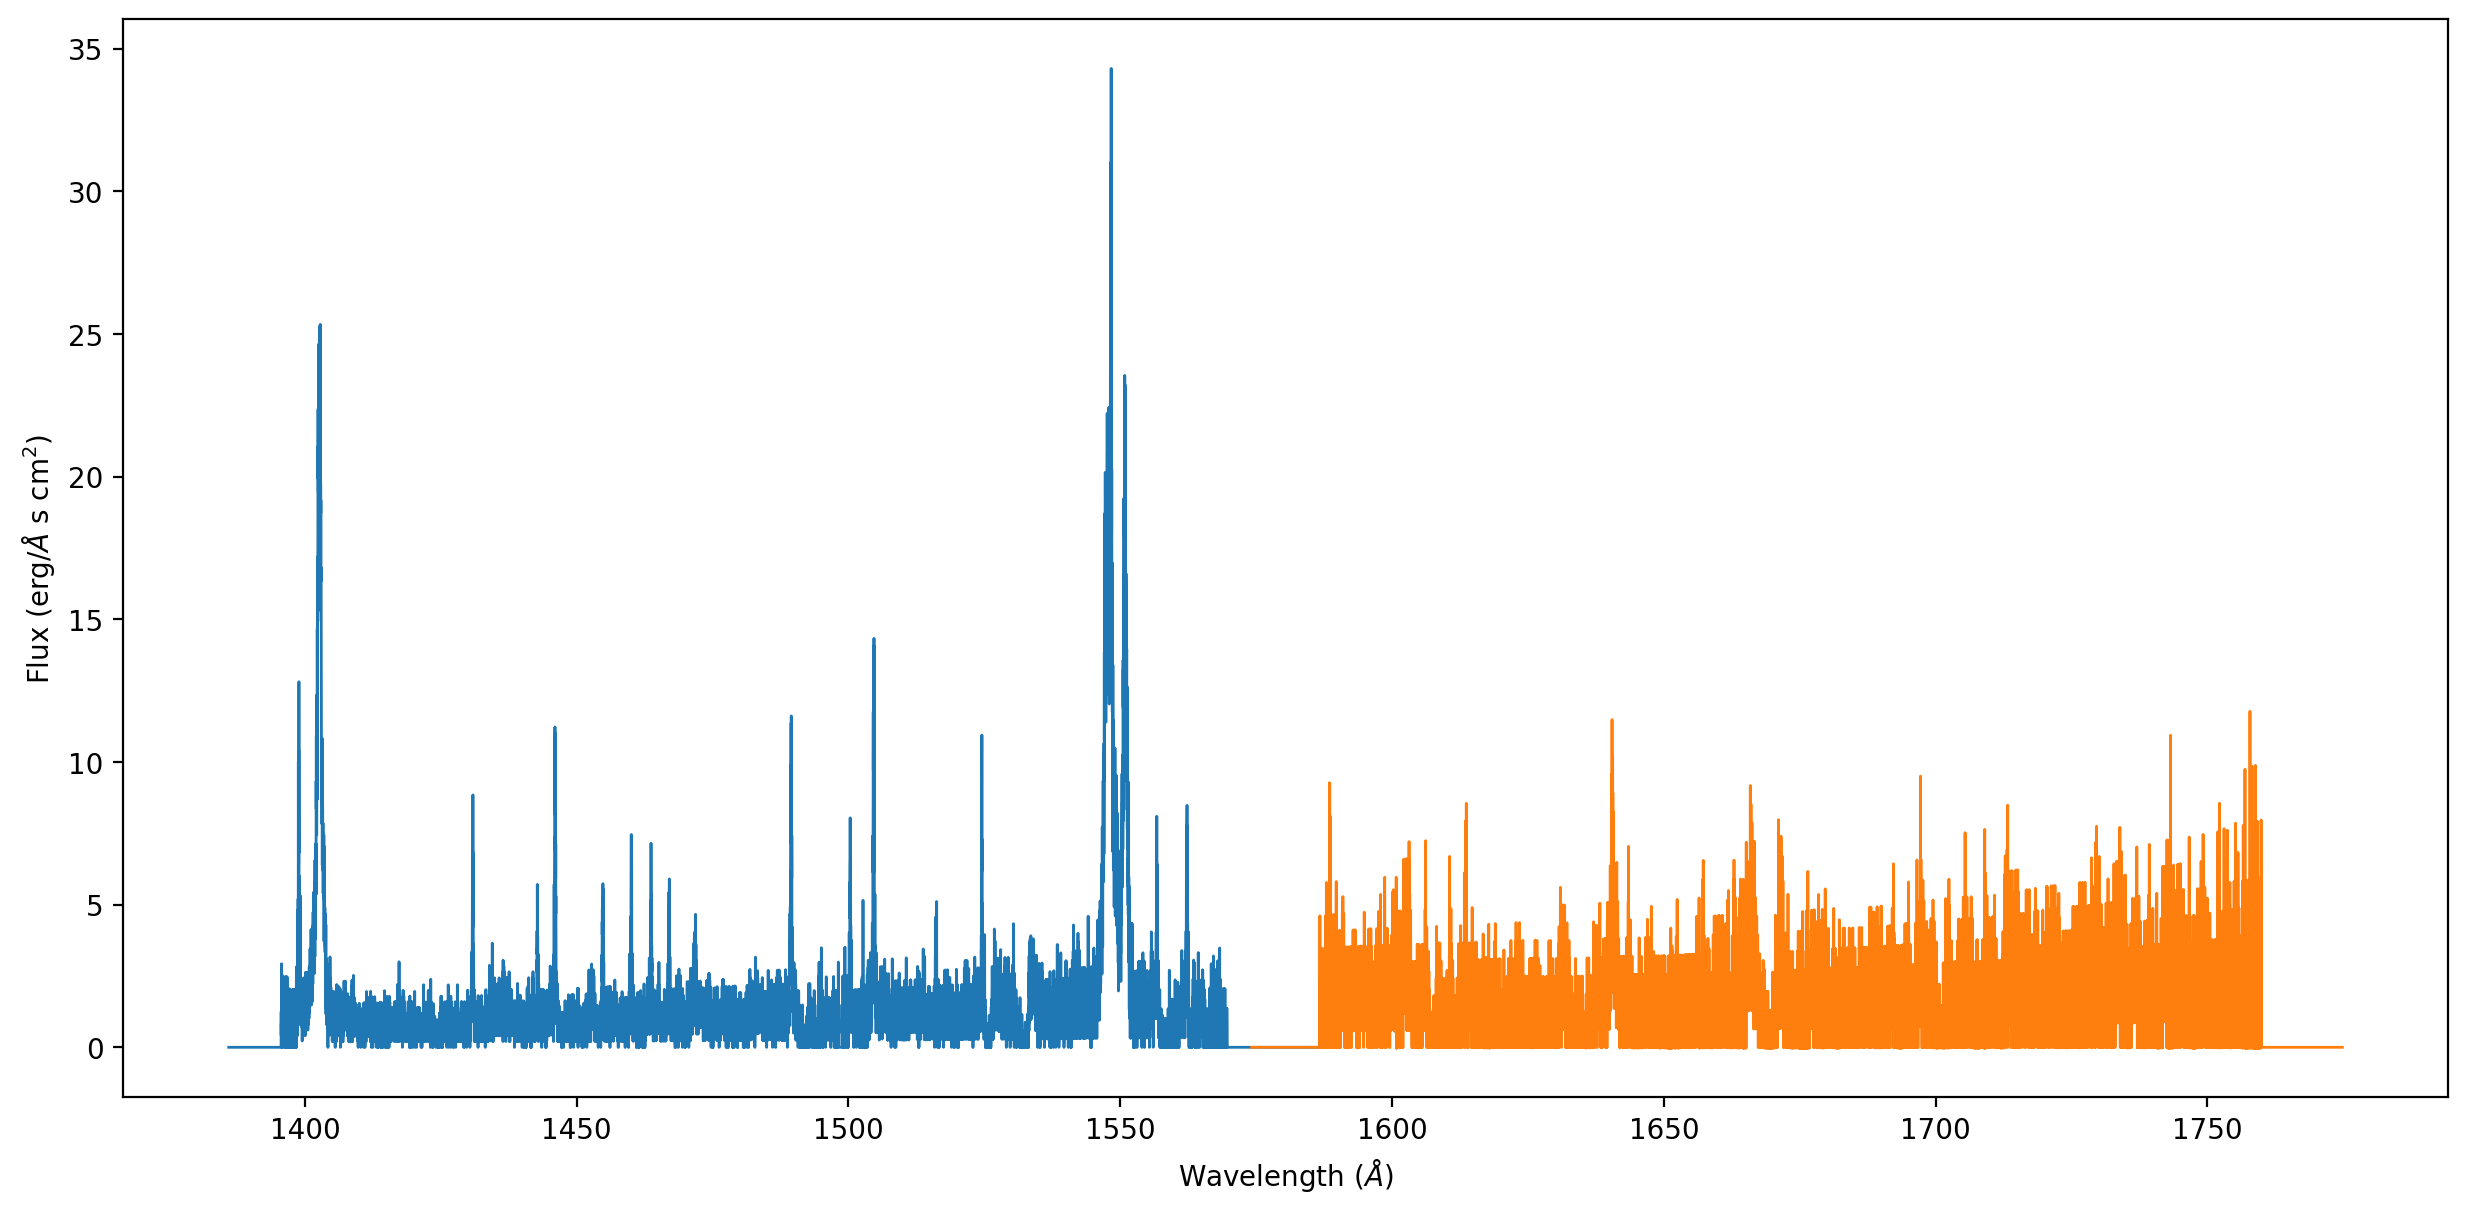

In [8]:
#make a plotting function
def plot_1dspec_full(file):
    x1d_data = Table.read(file, hdu=1)
    lam_uvb = x1d_data[1]['WAVELENGTH']
    flux_uvb = x1d_data[1]['FLUX']
    errb = x1d_data[1]['ERROR']
    lam_uva = x1d_data[0]['WAVELENGTH']
    flux_uva = x1d_data[0]['FLUX']
    erra = x1d_data[0]['ERROR']

    plt.figure(dpi=200, figsize=(15,7))
    plt.plot(lam_uvb, flux_uvb*1e14, lw=1)
    plt.plot(lam_uva, flux_uva*1e14, lw=1)
    plt.xlabel(r'Wavelength ($\AA$)')
    plt.ylabel(r'Flux ($\text{erg}/\AA \text{ s} \text{ cm}^2$)')
    #plt.xlim(1300, 1700)
    plt.show()
plot_1dspec_full(file)

In [9]:
asn = fits.open('HST/mastDownload/HST/lephae030/lephae030_asn.fits')
Table.read(asn)

FileNotFoundError: [Errno 2] No such file or directory: 'HST/mastDownload/HST/lephae030/lephae030_asn.fits'

# Calculating RV
graphs in paper are plotted within +-200km/s around line (1–7)R(3) [1,4] **1489.57** 0.094 1216.07

In [10]:
#delta_lam/lam * c = v

#read in line list
line_list = np.loadtxt('HST/emission_lines.csv', delimiter=',', dtype=str)
lab_lines = line_list[1:,3].astype(float)
pump_lambda = line_list[1:,5].astype(float)
min(pump_lambda)
#data comes from COS and STIS in this paper (France12)

/tmp/ipykernel_69529/3247057116.py:4: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  line_list = np.loadtxt('HST/emission_lines.csv', delimiter=',', dtype=str)


np.float64(1213.36)

In [11]:
#I think doing it this way isn't it because you can easily use a line that is not a peak, but rather an adjacent one. Especially for small radial velocities.
#so how do I find peaks?

#get H2 wavelengths and their fluxes from example spectra
full_spec = np.hstack([lam_uvb, lam_uva])
full_flux = np.hstack([flux_uvb, flux_uva])
full_err = np.hstack([errb, erra])

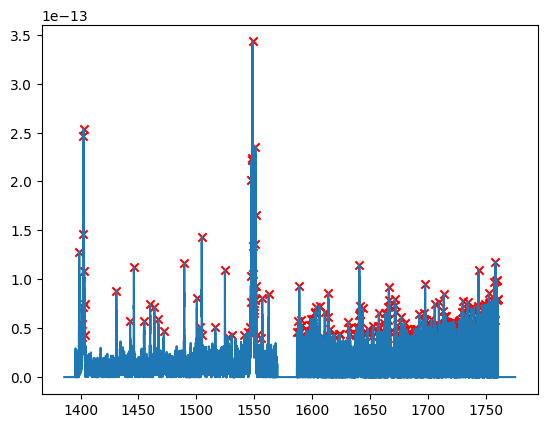

In [12]:
#try scipy find_peaks
#local_flux = full_flux[line_ids[18]-50 : line_ids[18]+50]
#local_spec = full_spec[line_ids[18]-50 : line_ids[18]+50]
peaks , _ = find_peaks(full_flux, height=4e-14, distance=20) #setting distance to 20 because of resolution of COS ~0.01 AA
plt.plot(full_spec,full_flux)
plt.scatter(full_spec[peaks], full_flux[peaks], c='red', marker='x')
plt.show()
#I think this filters out the peaks enough so it's not adjacent to the lab line instead of the actual peak that is closest.

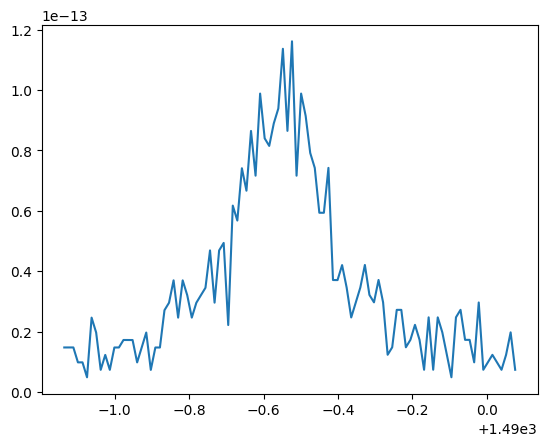

In [13]:
#find closest peak in filtered spectrum
wave_idx = peaks[np.argmin(abs(full_spec[peaks]-lab_lines[18]))]
plt.plot(full_spec[wave_idx-50:wave_idx+50], full_flux[wave_idx-50:wave_idx+50])
plt.show()

In [14]:
#solve doppler shift for delta_v
v = 200 #km/s
c = 299792 #km/s
rest_wavelength = lab_lines[18] #18 is 1489.57 from paper example of RU Lupi
wave_idx = peaks[np.argmin(abs(full_spec[peaks]-lab_lines[18]))]
wavelength = full_spec[wave_idx]
#find the wavelength that is closest to +-100km/s in full_spec
lower_lim = wavelength-((v/c)*rest_wavelength)
upper_lim = wavelength-((-v/c)*rest_wavelength)
#find the spectrum points that lie in this range
uidx = np.argmin(np.abs(full_spec-upper_lim))
lidx = np.argmin(np.abs(full_spec-lower_lim))
#get all wavelength points
wavelengths = full_spec[(lower_lim <= full_spec) & (full_spec <= upper_lim)]
#calculate RELATIVE rvs
rel_rv = (wavelengths-wavelength)/rest_wavelength * c
#get fluxes of points
rel_fluxes = full_flux[(lower_lim <= full_spec) & (full_spec <= upper_lim)]

Text(0.5, 1.0, 'RU Lupi line 1489.57 $\\AA$')

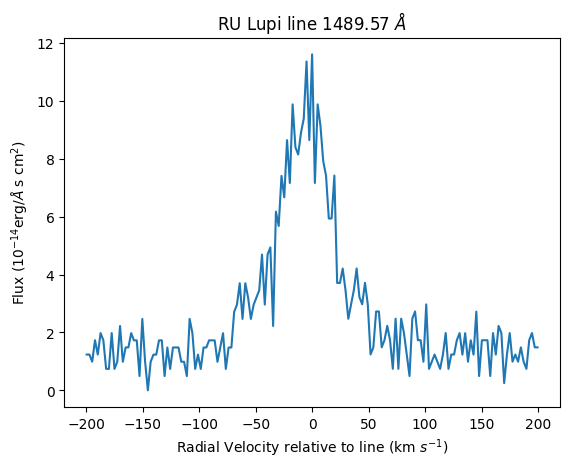

In [15]:
plt.plot(rel_rv, rel_fluxes*1e14)
plt.xlabel(r'Radial Velocity relative to line (km $s^{-1}$)')
plt.ylabel(r'Flux ($10^{-14} \text{erg}/\AA \text{ s} \text{ cm}^2$)')
plt.title(r'RU Lupi line 1489.57 $\AA$')


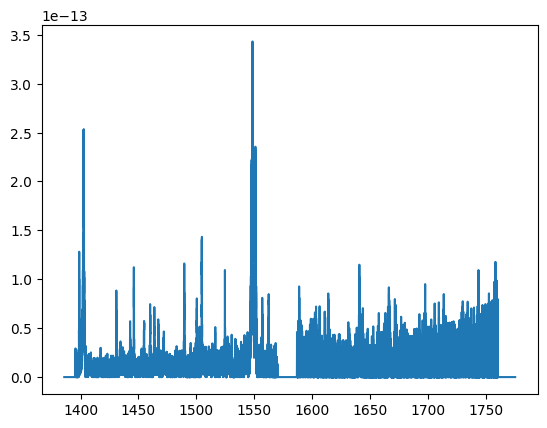

In [7]:
from astropy import units as u
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

lamb = full_spec * u.AA
flux = full_flux * u.Unit('erg cm-2 s-1 AA-1') 
err = full_err * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb[np.argsort(lamb)], flux=flux[np.argsort(lamb)], uncertainty = StdDevUncertainty(err))
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 

#specutils can't save you now, RVs are not normally distributed, nor do they have a clear mean

In [26]:
pkl_file_path = '/mnt/c/Users/prera/Documents/GitHub/UVH2disks/V4046Sgr/python2/V4046Sgr_H2velocity.pkl'
with open(pkl_file_path, 'rb') as file:
    data = pickle.load(file)

data

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/prera/Documents/GitHub/UVH2disks/V4046Sgr/python2/V4046Sgr_H2velocity.pkl'

In [16]:
#!TODO: change to use signal peaks
peaks , _ = find_peaks(full_flux, height=4e-14, distance=20) #setting distance to 20 because of resolution of COS ~0.01 AA
def velocities(lab_line):
    #solve doppler shift for delta_v
    v = 200 #km/s - relative velocity limits (seems like +-200 km/s in the example pkl files)
    c = 299792 #km/s
    rest_wavelength = lab_line #18 is 1489.57 from paper example of RU Lupi
    wave_idx = peaks[np.argmin(abs(full_spec[peaks]-lab_line))]
    wavelength = full_spec[wave_idx]
    #find the wavelength that is closest to (v) km/s in full_spec
    lower_lim = wavelength-((v/c)*rest_wavelength)
    upper_lim = wavelength-((-v/c)*rest_wavelength)
    #find the spectrum points that lie in this range
    uidx = np.argmin(np.abs(full_spec-upper_lim))
    lidx = np.argmin(np.abs(full_spec-lower_lim))
    #get all wavelength points
    wavelengths = full_spec[(lower_lim <= full_spec) & (full_spec <= upper_lim)]
    #calculate RELATIVE rvs
    rel_rv = (wavelengths-wavelength)/rest_wavelength * c
    #get fluxes of points
    rel_fluxes = full_flux[(lower_lim <= full_spec) & (full_spec <= upper_lim)]

    return rel_rv, rel_fluxes

In [27]:
line_dict = []
vel_dict = []
for line in lab_lines:
    rv, flux = velocities(line)
    line_dict.append(str(line))
    vel_dict.append(rv)
rv_dict = {line: rv for line, rv in zip(line_dict, vel_dict)}
rv_dict

#save as pkl file
with open('example_RULupi.pkl', 'wb') as handle:
    pickle.dump(rv_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)